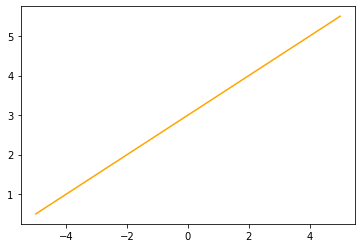

In [1]:
# plot a line
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-5, 5, 100)
y = 0.5 * x + 3
plt.plot(x, y, c = 'orange')
plt.show()

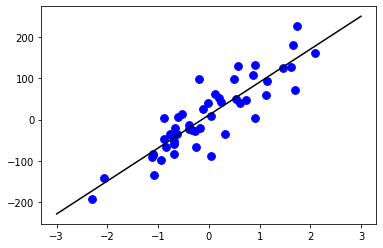

slope is 79.52
intercept is 10.92


In [4]:
# linear regression sample
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=50, n_features=1, n_informative=1, noise=50, random_state=1)
reg = LinearRegression()
reg.fit(X, y)

z = np.linspace(-3, 3, 200).reshape(-1, 1)     # make it a column np array
plt.scatter(X, y, c='b', s=60)
plt.plot(z, reg.predict(z), c='k')
plt.show()

#help(reg)
print('slope is {:.2f}'.format(reg.coef_[0]))
print('intercept is {:.2f}'.format(reg.intercept_))

In [14]:
# ordinary linear regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_diabetes

X, y = load_diabetes().data, load_diabetes().target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=8)
lr = LinearRegression().fit(X_train, y_train)

print('{:.2f}'.format(lr.score(X_train, y_train)))
print('{:.2f}'.format(lr.score(X_test, y_test)))

0.53
0.46


In [21]:
# ridge regression
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=0.1).fit(X_train, y_train)        # larget the alpha, smaller the coefficients

print('{:.2f}'.format(ridge.score(X_train, y_train)))
print('{:.2f}'.format(ridge.score(X_test, y_test)))

0.52
0.47


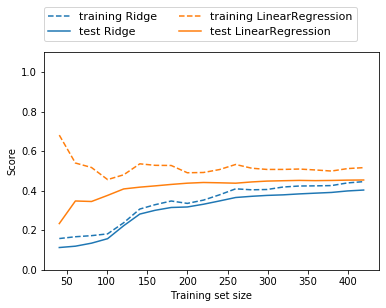

In [27]:
# draw learning curves
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve, KFold

def plot_learning_curve(est, X, y):
    training_set_size, train_scores, test_scores = learning_curve(
    est, X, y, train_sizes=np.linspace(.1, 1, 20), cv=KFold(20, shuffle=True, random_state=1))
    estimator_name = est.__class__.__name__
    line = plt.plot(training_set_size, train_scores.mean(axis=1), '--', label='training ' + estimator_name)
    plt.plot(training_set_size, test_scores.mean(axis=1), '-', label='test ' + estimator_name, c=line[0].get_color())
    plt.xlabel('Training set size')
    plt.ylabel('Score')
    plt.ylim(0, 1.1)

plot_learning_curve(Ridge(alpha=1), X, y)
plot_learning_curve(LinearRegression(), X, y)
plt.legend(loc=(0, 1.05), ncol=2, fontsize=11)
plt.show()

In [30]:
# Lasso regression / L1 regularization
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1, max_iter=100000).fit(X_train, y_train)
print('{:.2f}'.format(lasso.score(X_train, y_train)))
print('{:.2f}'.format(lasso.score(X_test, y_test)))
print('features used: {}'.format(np.sum(lasso.coef_ != 0)))

0.52
0.48
features used: 7


In [53]:
# Elastic Net
from sklearn.linear_model import ElasticNet

#help(ElasticNet)
enet = ElasticNet(alpha=0.25, l1_ratio=1).fit(X_train, y_train)

print('{:.2f}'.format(enet.score(X_train, y_train)))
print('{:.2f}'.format(enet.score(X_test, y_test)))
print('features used: {}'.format(np.sum(enet.coef_ != 0)))

0.49
0.48
features used: 5
